<a href="https://colab.research.google.com/github/Dulon18/Machine_Learning_project/blob/main/Image_Classification_in_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#loading dataset
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [4]:
#find row and columns for x train data
x_train.shape

(50000, 32, 32, 3)

In [5]:
#find row and columns for x test data
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes =['airplane','atuomobile','bird','cat','deer','dog','frog','house','ship','truck']

In [10]:
classes[4]

'deer'

In [11]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

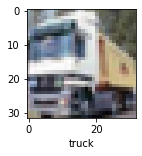

In [12]:
plot_sample(x_train,y_train, 1)

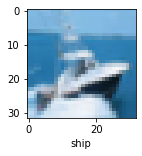

In [13]:
plot_sample(x_train,y_train,8)

# Normalize image 

In [14]:
x_train = x_train/255
x_test = x_test/255

# **Model building and training**

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000,activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10,activation='sigmoid')
    
])

ann.compile(optimizer = 'SGD',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs=30)


Epoch 1/30
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8133 - accuracy: 0.3538
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6253 - accuracy: 0.4261
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5441 - accuracy: 0.4555
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4807 - accuracy: 0.4786
Epoch 5/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4313 - accuracy: 0.4976
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3898 - accuracy: 0.5134
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3504 - accuracy: 0.5254
Epoch 8/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3155 - accuracy: 0.5392
Epoch 9/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2802 - accuracy: 0.5543
Epoch 10/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.25

In [16]:
ann.evaluate(x_test , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6503 - accuracy: 0.4764


[1.6502982378005981, 0.4763999879360199]

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report for ann model : \n',classification_report(y_test, y_pred_classes))

Classification Report for ann model : 
               precision    recall  f1-score   support

           0       0.65      0.57      0.61      1000
           1       0.52      0.81      0.64      1000
           2       0.51      0.32      0.39      1000
           3       0.49      0.11      0.17      1000
           4       0.61      0.33      0.43      1000
           5       0.23      0.88      0.37      1000
           6       0.68      0.44      0.53      1000
           7       0.69      0.48      0.57      1000
           8       0.88      0.39      0.54      1000
           9       0.66      0.45      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.59      0.48      0.48     10000
weighted avg       0.59      0.48      0.48     10000



In [18]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
        layers.MaxPool2D((2,2)),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
        layers.MaxPool2D((2,2)),
        #dense               
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax')
    
])

In [19]:
cnn.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [31]:
cnn.fit(x_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8751 - accuracy: 0.6936
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8400 - accuracy: 0.7072
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8017 - accuracy: 0.7190
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7659 - accuracy: 0.7329
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7422 - accuracy: 0.7392
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7122 - accuracy: 0.7506
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6840 - accuracy: 0.7602
Epoch 8/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6634 - accuracy: 0.7662
Epoch 9/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6398 - accuracy: 0.7753
Epoch 10/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.621

In [32]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4621 - accuracy: 0.6706


[1.462126612663269, 0.6705999970436096]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [34]:
y_test = y_test.reshape(-1,)

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

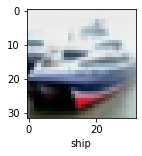

In [36]:
plot_sample(x_test,y_test,1)

In [37]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.18312337e-05, 6.02948163e-08, 2.83126225e-04, 9.99225855e-01,
        5.80049857e-08, 1.05453757e-04, 5.07494879e-05, 4.02727665e-07,
        3.22444859e-04, 1.33711673e-08],
       [2.82551441e-03, 8.58288491e-04, 5.90949071e-07, 1.21295899e-12,
        5.64275456e-16, 8.34283204e-14, 7.18081150e-11, 4.73865866e-17,
        9.96287107e-01, 2.85177084e-05],
       [4.08935547e-02, 1.25298813e-01, 1.33351667e-03, 2.09739097e-04,
        3.06683942e-04, 1.02057653e-04, 2.28323438e-06, 7.50680920e-05,
        8.31437051e-01, 3.41243314e-04],
       [9.76359248e-01, 8.40147152e-07, 1.79784484e-02, 3.45552061e-03,
        7.22691084e-06, 1.74681991e-05, 1.10215105e-05, 1.62173292e-05,
        2.15353840e-03, 5.27259488e-07],
       [3.20681686e-08, 4.20917559e-08, 1.31445518e-03, 4.89557758e-02,
        1.04745649e-01, 1.32026826e-03, 8.43662858e-01, 7.36190060e-08,
        8.03509181e-07, 1.79792725e-09]], dtype=float32)

In [38]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [39]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

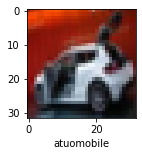

In [40]:
plot_sample(x_test,y_test,6)

In [41]:
classes[y_classes[6]]

'atuomobile'